### DIABETES READMISSION PREDICTION MODEL 

#### 1.PROCESSES INVOLVED

##### 2.EDA

##### 3.DATA VISUALISATION

##### 4.FEATURE ENGINEERING

##### 5.TRAINING AND SPLITTING

##### 6.ALGORITHM ANALYSIS

##### 7.HYPERAMETER TUNING OF BEST ALGORITHM

##### 8.MODEL SAVING

### OVERVIEW OF THE PREDICTION MODEL

##### -This model aims to predict diabetes outcomes using a combination of exploratory data analysis ,data visualisation, feature engineering 
##### and machine learning techniques


#### KEY STEPS

##### -EDA AND DATA VISUALISATION:This involves understanding the distribution and relationships between variables

##### -FEATURE ENGINEERING: Handling missing values,converying variablesinto suitable formats and preparing data for modelling
    
##### -TRAINING AND SPLITTING: Splitting data into 70% training and 30% validation sets
    
##### -ALGORITHM ANALYSIS:Evaluating Adaboost,KNN ,SGD Classifier with Adaboost showing the best perfomance with an accuracy of 0.68 and
##### an auc of 0.66 

###### -HYPERAMETER TUNING:Optimizing Adaboost model parameters for improved perfomance 
    
##### -MODEL SAVING : Saving the trained model for future use 

#### EXPLORATORY DATA ANALYSIS

In [1]:
#importing libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import time #helps you to understand the excecution time for a code,it will also help to measure prediction time  

In [2]:
#LOADING THE DATASET
diabetes_df = pd.read_csv("C:/Users/Latista Tech/Desktop/datasets/diabetic_data.csv")

In [3]:
#EXAMINING THE NUMBER OF ROWS AND COLUMNS IN THE DATASET

diabetes_df.shape

(101766, 50)

In [4]:
#overview of the attributes so as to understand the dataset featuresad and their characteristics
#so as to determine which attributes are relevant for predicting patient readmissions

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
#checking the discharge deposition ID , which tells us situation of patient after being hospitalised
diabetes_df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
11     1642
12        3
13      399
14      372
15       63
16       11
17       14
18     3691
19        8
20        2
22     1993
23      412
24       48
25      989
27        5
28      139
dtype: int64

In [6]:
#now loadig the IDs_mapping inoreder to understand the situation of the patient after being hospitalised
IDS_mapping = pd.read_csv("C:/Users/Latista Tech/Desktop/datasets/IDS_mapping.csv")

In [7]:
def display_all(IDS_mapping):
    with pd.option_context("display.max_row", 100, "display.max_columns", 100):
        display(IDS_mapping)
display_all(IDS_mapping.head(67))

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [8]:
#removing samples with ids = [11,13,14,19,20,21 ] as they are related to death according to IDS MAPPING
diabetes_df = diabetes_df.loc[~diabetes_df.discharge_disposition_id.isin([11, 13, 14, 19, 20, 21])]

In [9]:
diabetes_df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
12        3
15       63
16       11
17       14
18     3691
22     1993
23      412
24       48
25      989
27        5
28      139
dtype: int64

In [10]:
#cheking the target variable so as to examine the distribution of the readmitted and non_readmitted patients

diabetes_df.groupby('readmitted').size()

readmitted
<30    11314
>30    35502
NO     52527
dtype: int64

In [11]:
# Defining a target variable to predict if a patient will be readmitted within 30 Days or not
diabetes_df['readmission_status'] = (diabetes_df.readmitted == '<30').astype('int')

In [12]:
diabetes_df['readmission_status']

0         0
1         0
2         0
3         0
4         0
         ..
101761    0
101762    0
101763    0
101764    0
101765    0
Name: readmission_status, Length: 99343, dtype: int32

In [13]:
#now we want to see if the readmission status column has  bee added

diabetes_df.head(200)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmission_status
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2663004,780975,Caucasian,Female,[70-80),?,6,25,1,4,...,No,No,No,No,No,No,No,Yes,>30,0
203,2664138,8432703,Caucasian,Female,[60-70),?,6,25,1,4,...,No,No,No,No,No,No,No,Yes,>30,0
204,2671290,3492477,AfricanAmerican,Male,[10-20),?,6,25,1,10,...,Steady,No,No,No,No,No,No,Yes,NO,0
205,2674350,3845322,AfricanAmerican,Male,[60-70),?,6,25,7,4,...,Steady,No,No,No,No,No,No,Yes,NO,0


In [14]:
# Calculating prevalence of patients readmitted within 30 days this helps us inform model evaluation ,development and interpretation
def calc_prev(
    target: np.ndarray
)->float:
  return sum(target)/len(target)

print('Prevalence: %.3f'%calc_prev(diabetes_df['readmission_status'].values))


Prevalence: 0.114


## DATA VISUALIZATION

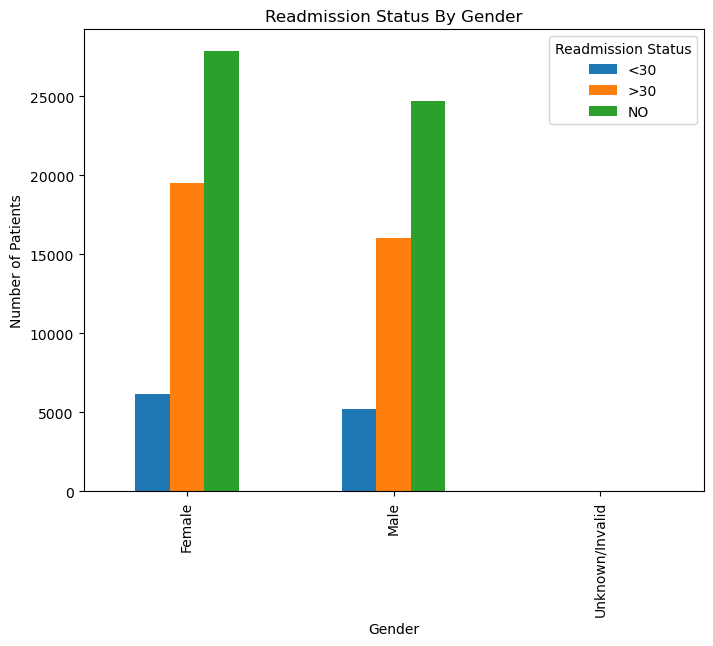

In [15]:
import matplotlib.pyplot as plt 
grouped_df= diabetes_df.groupby(['gender','readmitted']).size().unstack()
grouped_df.plot(kind='bar',figsize=(8,6))
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('Readmission Status By Gender')
plt.legend(title='Readmission Status')
plt.show()

## FEATURE ENGINEERING

In [16]:
# Looking at unique values for each of the columns
for col in list(diabetes_df.columns):
    n = diabetes_df[col].unique()

    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(f'{col} : {n}')
    else:
        print(col + ': ' +str(len(n)) + ' unique values')
        
#this helps us when doing feature engineering as it tells us about  unique values which are different options or values that appear once or more in a col

encounter_id: 99343 unique values
patient_nbr: 69990 unique values
race : ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender : ['Female' 'Male' 'Unknown/Invalid']
age : ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight : ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id : [6 1 2 3 4 5 8 7]
discharge_disposition_id : [25  1  3  6  2  5  7 10  4 18  8 12 16 17 22 23  9 15 24 28 27]
admission_source_id : [ 1  7  2  4  5 20  6  3 17  8  9 14 10 22 11 25 13]
time_in_hospital : [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code : ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty: 73 unique values
num_lab_procedures: 118 unique values
num_procedures : [0 5 1 6 2 3 4]
num_medications: 75 unique values
number_outpatient: 39 unique values
number_emergency: 33 unique values
number_inpati

In [17]:
# replace ? with nan

diabetes_df = diabetes_df.replace('?',np.nan)

In [18]:
# Checking any numeric columns with null values
cols_num = [
    'time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses'
    ]
diabetes_df[cols_num].isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

In [19]:
# Checking null values in categorical features

cols_cat = [
    'race', 'gender', 'max_glu_serum', 'A1Cresult',
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
    'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone', 'change', 'diabetesMed','payer_code'
  ]
diabetes_df[cols_cat].isnull().sum() 

race                         2234
gender                          0
max_glu_serum               94191
A1Cresult                   82509
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
payer_code                  39398
dtype: int64

In [20]:
diabetes_df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2234
gender                          0
age                             0
weight                      96218
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  39398
medical_specialty           48616
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         20
diag_2                        356
diag_3                       1419
number_diagnoses                0
max_glu_serum               94191
A1Cresult                   82509
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [21]:
#replacing the missing value in categorical variables that is race , payer_code and medical speciality  by adding another categorical type for unkown using the fillna funnction
diabetes_df['race'] = diabetes_df['race'].fillna('UNK')
diabetes_df['payer_code'] = diabetes_df['payer_code'].fillna('UNK')
diabetes_df['medical_specialty'] = diabetes_df['medical_specialty'].fillna('UNK')

#replacing null values with unkown reduces bias and it retains the fact that the data is missing rather than imputing incorrect values

In [22]:
print('Number medical specialty:', diabetes_df.medical_specialty.nunique())
diabetes_df.groupby('medical_specialty').size().sort_values(ascending = False)

Number medical specialty: 73


medical_specialty
UNK                                 48616
InternalMedicine                    14237
Emergency/Trauma                     7419
Family/GeneralPractice               7252
Cardiology                           5279
                                    ...  
Surgery-PlasticwithinHeadandNeck        1
Dermatology                             1
Proctology                              1
Psychiatry-Addictive                    1
Speech                                  1
Length: 73, dtype: int64

In [23]:
top_10 = [
    'UNK','InternalMedicine','Emergency/Trauma',
    'Family/GeneralPractice', 'Cardiology','Surgery-General',
    'Nephrology','Orthopedics', 'Orthopedics-Reconstructive',
    'Radiologist'
  ]

# make a new column with duplicated data
diabetes_df['med_spec'] = diabetes_df['medical_specialty'].copy()

# replace all specialties not in top 10 with 'Other' category
diabetes_df.loc[~diabetes_df.med_spec.isin(top_10),'med_spec'] = 'Other'

In [24]:
diabetes_df.groupby('med_spec').size()

med_spec
Cardiology                     5279
Emergency/Trauma               7419
Family/GeneralPractice         7252
InternalMedicine              14237
Nephrology                     1539
Orthopedics                    1392
Orthopedics-Reconstructive     1230
Other                          8199
Radiologist                    1121
Surgery-General                3059
UNK                           48616
dtype: int64

In [25]:
#now we are converting numerical variables to strings so that they ca be easily be coverted ito a for algorithms can understand by using get dummies
cols_cat_num = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

diabetes_df[cols_cat_num] = diabetes_df[cols_cat_num].astype('str')

In [26]:
df_cat = pd.get_dummies(diabetes_df[cols_cat + cols_cat_num + ['med_spec']],drop_first = True)

In [27]:
df_cat.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Male,gender_Unknown/Invalid,max_glu_serum_>300,max_glu_serum_Norm,A1Cresult_>8,...,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [28]:
enc_diabetes_df = pd.concat([diabetes_df,df_cat], axis = 1)

In [29]:
enc_diabetes_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,False,False,False,False,False,False,True,False,False,False
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,False,False,False,False,False,False,False,False,False,True
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,False,False,False,False,False,False,False,False,False,True
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,False,False,False,False,False,False,False,False,False,True
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,False,False,False,False,False,False,False,False,False,True


In [30]:
cols_all_cat = list(df_cat.columns)

In [31]:
cols_all_cat

['race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'race_UNK',
 'gender_Male',
 'gender_Unknown/Invalid',
 'max_glu_serum_>300',
 'max_glu_serum_Norm',
 'A1Cresult_>8',
 'A1Cresult_Norm',
 'metformin_No',
 'metformin_Steady',
 'metformin_Up',
 'repaglinide_No',
 'repaglinide_Steady',
 'repaglinide_Up',
 'nateglinide_No',
 'nateglinide_Steady',
 'nateglinide_Up',
 'chlorpropamide_No',
 'chlorpropamide_Steady',
 'chlorpropamide_Up',
 'glimepiride_No',
 'glimepiride_Steady',
 'glimepiride_Up',
 'acetohexamide_Steady',
 'glipizide_No',
 'glipizide_Steady',
 'glipizide_Up',
 'glyburide_No',
 'glyburide_Steady',
 'glyburide_Up',
 'tolbutamide_Steady',
 'pioglitazone_No',
 'pioglitazone_Steady',
 'pioglitazone_Up',
 'rosiglitazone_No',
 'rosiglitazone_Steady',
 'rosiglitazone_Up',
 'acarbose_No',
 'acarbose_Steady',
 'acarbose_Up',
 'miglitol_No',
 'miglitol_Steady',
 'miglitol_Up',
 'troglitazone_Steady',
 'tolazamide_Steady',
 'tolazamide_Up',
 'insulin_No',
 'insulin_Stead

In [32]:
enc_diabetes_df[['age', 'weight']].head()

,age,weight
0,[0-10),NaN
1,[10-20),NaN
2,[20-30),NaN
3,[30-40),NaN
4,[40-50),NaN


In [33]:
enc_diabetes_df.groupby('age').size()

age
[0-10)        160
[10-20)       690
[20-30)      1649
[30-40)      3764
[40-50)      9607
[50-60)     17060
[60-70)     22059
[70-80)     25331
[80-90)     16434
[90-100)     2589
dtype: int64

In [34]:
age_id = {'[0-10)':0,
          '[10-20)':10,
          '[20-30)':20,
          '[30-40)':30,
          '[40-50)':40,
          '[50-60)':50,
          '[60-70)':60,
          '[70-80)':70,
          '[80-90)':80,
          '[90-100)':90}
enc_diabetes_df['age_group'] = enc_diabetes_df.age.replace(age_id)

In [35]:
enc_diabetes_df.weight.notnull().sum()

3125

In [36]:
enc_diabetes_df['has_weight'] = enc_diabetes_df.weight.notnull().astype('int')

In [37]:
cols_extra = ['age_group','has_weight']

In [38]:
print('Total number of features:', len(cols_num + cols_all_cat + cols_extra))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))
print('Extra features:',len(cols_extra))

Total number of features: 141
Numerical Features: 8
Categorical Features: 131
Extra features: 2


In [39]:
enc_diabetes_df[cols_num + cols_all_cat + cols_extra].isnull().sum().sort_values(ascending = False).head(10)

time_in_hospital               0
discharge_disposition_id_17    0
admission_type_id_7            0
admission_type_id_8            0
discharge_disposition_id_10    0
discharge_disposition_id_12    0
discharge_disposition_id_15    0
discharge_disposition_id_16    0
discharge_disposition_id_18    0
admission_type_id_5            0
dtype: int64

In [40]:
col2use = cols_num + cols_all_cat + cols_extra
df_data = enc_diabetes_df[col2use + ['readmission_status']]

In [41]:
#now we are going to shuffle the samples so that  the training and testing 
#testing sets are the representative of the whole dataset

df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

#### SPLITTING THE DATASET

In [42]:
# Save 30% of the data as validation and test data
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [43]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [44]:
# use the rest of the data as training data
df_train_all = df_data.drop(df_valid_test.index)

In [45]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prev(df_test.readmission_status.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prev(df_valid.readmission_status.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prev(df_train_all.readmission_status.values)))

Test prevalence(n = 14902):0.117
Valid prevalence(n = 14901):0.113
Train all prevalence(n = 69540):0.113


In [46]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 99343)


In [47]:
#since our dataset is imbalanced that is it has more negatives than positives so 
#inorder to get rid of this we will use the sub sample method which helps us to get 50% negatives and 50% positives 

# split the training data into positive and negative
rows_pos = df_train_all.readmission_status == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prev(df_train.readmission_status.values)))


Train balanced prevalence(n = 15766):0.500


In [48]:
X_train = df_train[col2use].values
X_train_all = df_train_all[col2use].values
X_valid = df_valid[col2use].values

y_train = df_train['readmission_status'].values
y_valid = df_valid['readmission_status'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (69540, 141)
Training shapes: (15766, 141) (15766,)
Validation shapes: (14901, 141) (14901,)


## ANALYSING DIFFERENT ALGORITHMS

In [49]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler()

In [50]:
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

In [51]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):

    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC: %.3f'%auc)
    print('accuracy: %.3f'%accuracy)
    print('recall: %.3f'%recall)
    print('precision: %.3f'%precision)
    print('specificity: %.3f'%specificity)
    print('prevalence: %.3f'%calc_prev(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

In [52]:
thresh = 0.5

# SGDC CLASSIFIER

In [53]:
from sklearn.metrics import  confusion_matrix as cm
import seaborn as sns

In [54]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log_loss',penalty='l2', max_iter=1000)
sgd.fit(X_train_tf, y_train)


SGDClassifier(loss='log_loss')

In [55]:
y_train_preds = sgd.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgd.predict_proba(X_valid_tf)[:,1]

print('                      SGDC CLASSIFIER                    ')
print('------------------------------------------------------------------------')
print('Training:')
sgd_train_auc, sgd_train_accuracy, sgd_train_recall, sgd_train_precision, sgd_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgd_valid_auc, sgd_valid_accuracy, sgd_valid_recall, sgd_valid_precision, sgd_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

                      SGDC CLASSIFIER                    
------------------------------------------------------------------------
Training:
AUC: 0.630
accuracy: 0.595
recall: 0.526
precision: 0.611
specificity: 0.665
prevalence: 0.500
 
Validation:
AUC: 0.616
accuracy: 0.635
recall: 0.508
precision: 0.157
specificity: 0.651
prevalence: 0.113
 


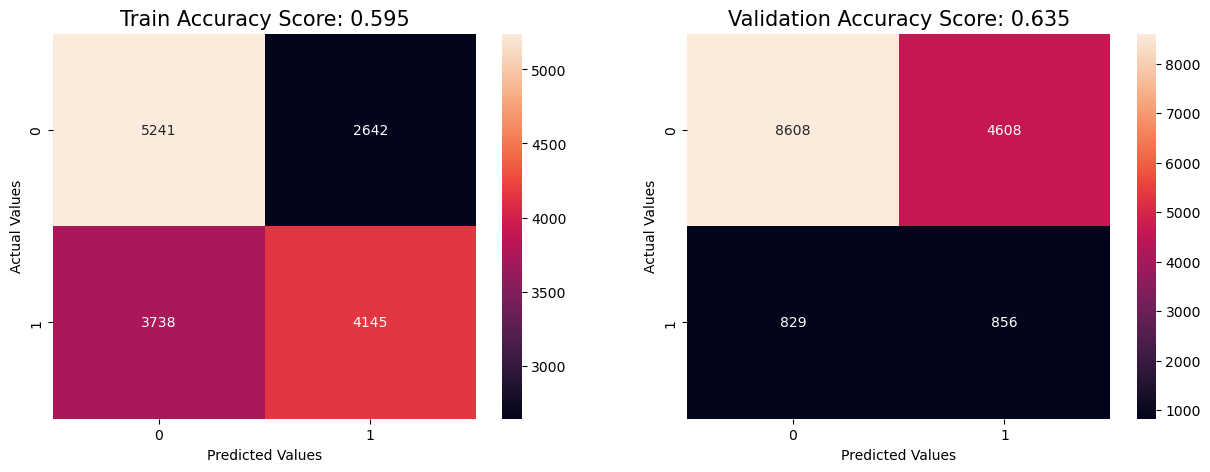

In [56]:
#confusion matrix 

predictions = sgd.predict(X_train_tf)
train_score = round(accuracy_score(y_train,predictions), 3)
cm_train = cm(y_train, predictions)

predictions = sgd.predict(X_valid_tf)
val_score = round(accuracy_score(y_valid, predictions), 3)
cm_val = cm(y_valid, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

## RANDOM FOREST CLASSIFIER

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=6, random_state=42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [58]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('                             Random Forest                              ')
print('------------------------------------------------------------------------')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)


                             Random Forest                              
------------------------------------------------------------------------
Training:
AUC: 0.692
accuracy: 0.639
recall: 0.608
precision: 0.648
specificity: 0.670
prevalence: 0.500
 
Validation:
AUC: 0.658
accuracy: 0.628
recall: 0.604
precision: 0.173
specificity: 0.631
prevalence: 0.113
 


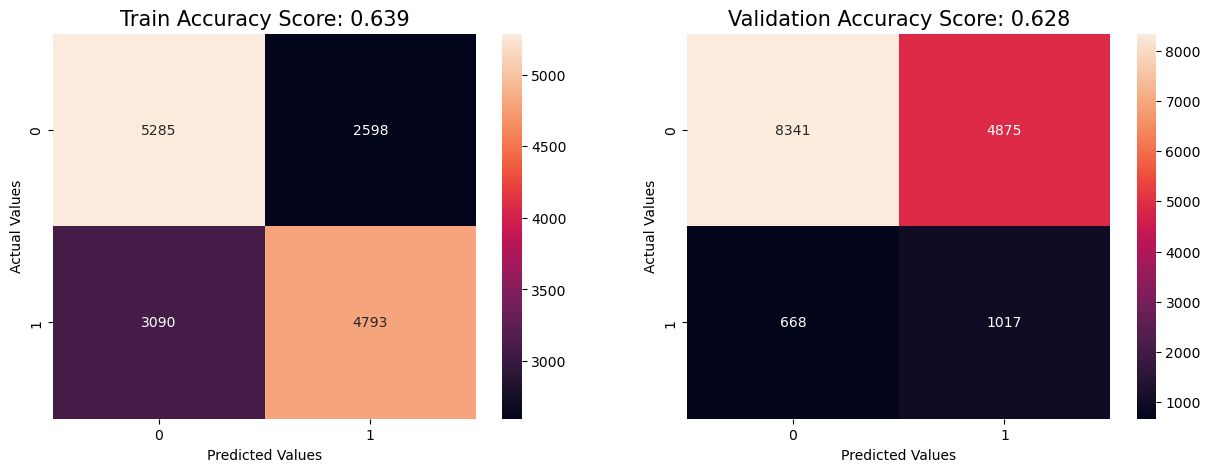

In [59]:
#confusion matrix 

predictions = rf.predict(X_train_tf)
train_score = round(accuracy_score(y_train,predictions), 3)
cm_train = cm(y_train, predictions)

predictions = rf.predict(X_valid_tf)
val_score = round(accuracy_score(y_valid, predictions), 3)
cm_val = cm(y_valid, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

## ADABOOST CLASSIFIER

In [60]:
from sklearn.ensemble  import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn .metrics  import accuracy_score ,classification_report

adaboost=AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
adaboost.fit(X_train_tf,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [61]:
y_train_preds = adaboost.predict_proba(X_train_tf)[:,1]
y_valid_preds = adaboost.predict_proba(X_valid_tf)[:,1]

print('                            AdaBoost                             ')
print('------------------------------------------------------------------------')
print('Training:')
adaboost_train_auc, adaboost_train_accuracy, adaboost_train_recall, adaboost_train_precision, adaboost_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
adaboost_valid_auc, adaboost_valid_accuracy, adaboost_valid_recall, adaboost_valid_precision, adaboost_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

                            AdaBoost                             
------------------------------------------------------------------------
Training:
AUC: 0.665
accuracy: 0.616
recall: 0.520
precision: 0.644
specificity: 0.713
prevalence: 0.500
 
Validation:
AUC: 0.660
accuracy: 0.683
recall: 0.534
precision: 0.186
specificity: 0.702
prevalence: 0.113
 


In [62]:
from sklearn.metrics import  confusion_matrix as cm
import seaborn as sns

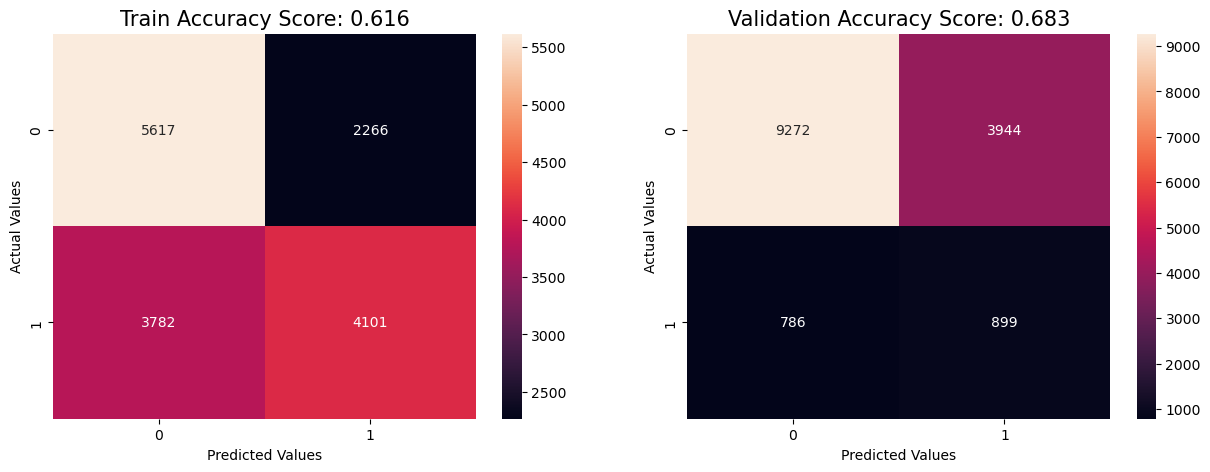

In [63]:
#confusion matrix 

predictions = adaboost.predict(X_train_tf)
train_score = round(accuracy_score(y_train,predictions), 3)
cm_train = cm(y_train, predictions)

predictions = adaboost.predict(X_valid_tf)
val_score = round(accuracy_score(y_valid, predictions), 3)
cm_val = cm(y_valid, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

## KNN ALGORITHM 

In [64]:
from sklearn.neighbors import  KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tf,y_train)

KNeighborsClassifier()

In [65]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('                            KNN                             ')
print('------------------------------------------------------------------------')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, knn_train_precision, knn_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

                            KNN                             
------------------------------------------------------------------------
Training:
AUC: 0.792
accuracy: 0.722
recall: 0.712
precision: 0.727
specificity: 0.732
prevalence: 0.500
 
Validation:
AUC: 0.582
accuracy: 0.570
recall: 0.545
precision: 0.140
specificity: 0.573
prevalence: 0.113
 


In [66]:
#showing the results for the above algorithms as a dataframe and also visualising the results 

train_results ={
    
    "Model" : ['Random Forest', 'SGD Classsifier', 'AdaBoost','KNN'],
    'AUC':[rf_train_auc, sgd_train_auc,adaboost_train_auc,knn_train_auc],
    'Accuracy': [rf_train_accuracy,sgd_train_accuracy,adaboost_train_accuracy,knn_train_accuracy],
    'Recall': [rf_train_recall,sgd_train_recall,adaboost_train_recall,knn_train_recall],
    'Precision' : [rf_train_precision,sgd_train_precision,adaboost_train_precision,knn_train_precision],
    'Specificity': [rf_train_specificity,sgd_train_specificity,adaboost_train_specificity,knn_train_specificity],
    'data_set':['train']*4
}

val_results ={
    "Model" : ['Random Forest', 'SGD Classsifier', 'AdaBoost','KNN'],
    'AUC':[rf_valid_auc, sgd_valid_auc,adaboost_valid_auc,knn_valid_auc],
    'Accuracy': [rf_valid_accuracy,sgd_valid_accuracy,adaboost_valid_accuracy,knn_valid_accuracy],
    'Recall': [rf_valid_recall,sgd_valid_recall,adaboost_valid_recall,knn_valid_recall],
    'Precision' : [rf_valid_precision,sgd_valid_precision,adaboost_valid_precision,knn_valid_recall],
    'Specificity': [rf_valid_specificity,sgd_valid_specificity,adaboost_valid_specificity,knn_valid_accuracy],
    'data_set':['valid']*4
    


}

train_df1 = pd.DataFrame(train_results)
val_df2 = pd.DataFrame(val_results)
results_df = pd.concat([train_df1, val_df2])

In [67]:

results_df

,Model,AUC,Accuracy,Recall,Precision,Specificity,data_set
0,Random Forest,0.691606,0.639224,0.608017,0.648491,0.670430,train
1,SGD Classsifier,0.629837,0.595332,0.525815,0.610726,0.664848,train
2,AdaBoost,0.665038,0.616390,0.520233,0.644102,0.712546,train
3,KNN,0.791781,0.722060,0.712039,0.726602,0.732082,train
0,Random Forest,0.657812,0.628012,0.603561,0.172607,0.631129,valid
1,SGD Classsifier,0.615525,0.635125,0.508012,0.156662,0.651332,valid
2,AdaBoost,0.660306,0.682572,0.533531,0.185629,0.701574,valid
3,KNN,0.581717,0.569760,0.545401,0.545401,0.569760,valid


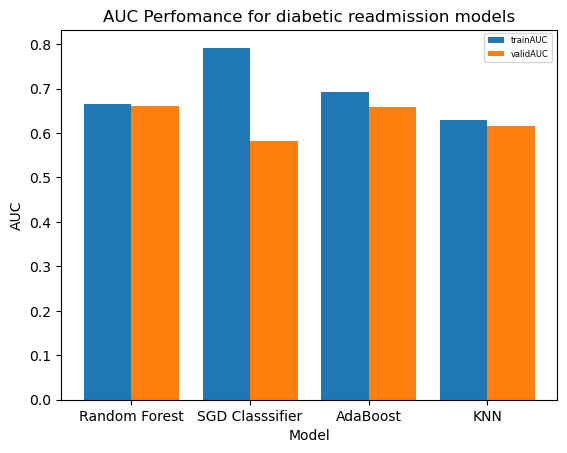

In [68]:
import matplotlib.pyplot as plt 
import numpy as np 

model = results_df['Model'].unique()
types = ['train','valid']
#setting  the width ,of the bars
bar_width = 0.4

#setting the x positiions of the bar
x = np.arange(len(model))

#creating the figure axis 
fig, ax = plt.subplots()

#create the bars 
for i, type in enumerate(types):
    auc_values= results_df[results_df['data_set']==type].groupby('Model')['AUC'].mean().values
    ax.bar(x + i * bar_width, auc_values, width=bar_width, label=type + 'AUC')
        
    
#set the title and labels 

ax.set_title('AUC Perfomance for diabetic readmission models')
ax.set_xlabel('Model')
ax.set_ylabel('AUC')
ax.set_xticks(x + bar_width/2 )
ax.set_xticklabels(model)
ax.legend(bbox_to_anchor=(1.04, 1.06),loc=1,borderaxespad=3.0,fontsize=6)
plt.show()

## HYPERAMETER TUNING 

In [69]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint



param_grid = {
    'n_estimators': randint(50, 150),
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

random_search = RandomizedSearchCV(
    estimator=AdaBoostClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,         # Reduced iterations
    scoring='roc_auc',
    cv=3,              # Fewer folds
    n_jobs=2,          # Limit CPU usage
    verbose=1,
    random_state=42
)

# Try a smaller sample for testing
X_sample = X_train_tf[:1000]
y_sample = y_train[:1000]

random_search.fit(X_sample, y_sample)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42),
                   n_jobs=2,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C41E2EE6D0>},
                   random_state=42, scoring='roc_auc', verbose=1)

In [70]:
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix
)

def print_report(y_true, y_pred_proba, threshold=0.5):
    # Apply threshold to get predicted class labels
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Print classification report
    print(classification_report(y_true, y_pred))

    # Calculate metrics
    auc = roc_auc_score(y_true, y_pred_proba)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    # Confusion matrix: [[TN, FP], [FN, TP]]
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Specificity = TN / (TN + FP)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

    return auc, accuracy, recall, precision, specificity


In [71]:
# Fit the model
random_search.fit(X_train_tf, y_train)

# Best estimator
best_adaboost = random_search.best_estimator_

# Predict probabilities on test set
y_pred_proba = best_adaboost.predict_proba(X_valid_tf)[:, 1]

# Evaluate
auc, acc, rec, prec, spec = print_report(y_valid, y_pred_proba, threshold=0.5)

# Show results
print("Best Parameters Found:", random_search.best_params_)
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Recall: {rec:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Specificity: {spec:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
              precision    recall  f1-score   support

           0       0.92      0.67      0.78     13216
           1       0.18      0.57      0.27      1685

    accuracy                           0.66     14901
   macro avg       0.55      0.62      0.53     14901
weighted avg       0.84      0.66      0.72     14901

Best Parameters Found: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 79}
AUC: 0.6644
Accuracy: 0.6588
Recall: 0.5703
Precision: 0.1806
Specificity: 0.6701


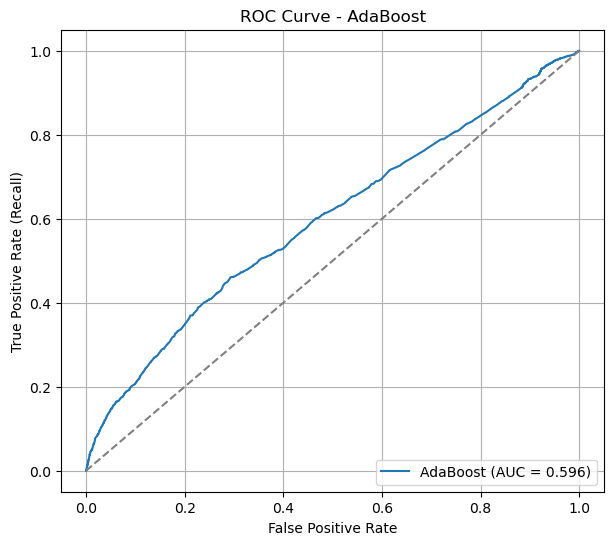

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_probs = best_adaboost.predict_proba(X_valid)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_valid, y_probs)

# Compute AUC
auc_score = roc_auc_score(y_valid, y_probs)

# Plot ROC curve
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"AdaBoost (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - AdaBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


##### Interpretation of the results obtained above: model perfomance 

###### Our daiabetes readmission prediction model achieved an ROC-AUC of 0.66 which is approximately 70% which indicates 
###### moderate predictive perfomance ,while there is still room for improvement, our model still demonstrates potential in 
###### identifying patients at high risk of readmission,these results suggest that our model can  provide valuable insightsfor clinical 
###### decision making,particularly when combined with other risk factors and clinical judgement


## MODEL INTERPRETATION

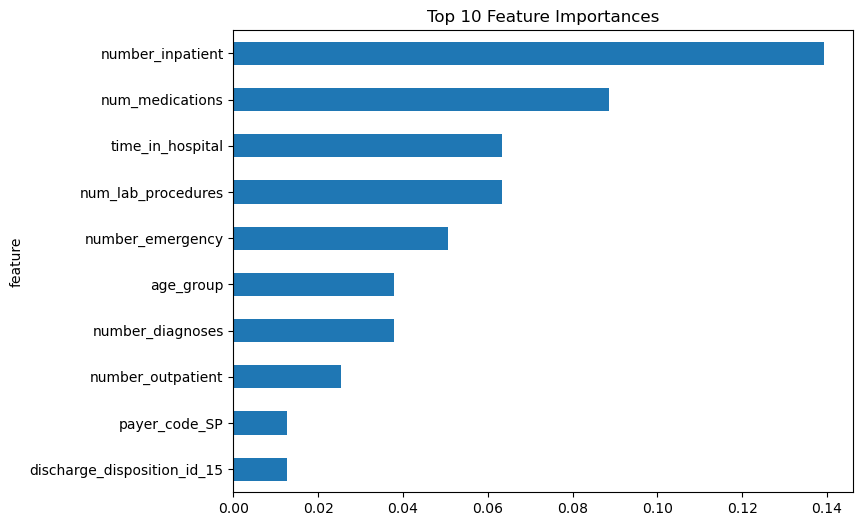

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from your model
importances = best_adaboost.feature_importances_

# Align feature names with importances
n = min(len(col2use), len(importances))
feature_names = col2use[:n]
importances = importances[:n]

# Build dataframe
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot top 10
importance_df.head(10).plot(
    kind='barh',
    x='feature',
    y='importance',
    legend=False,
    figsize=(8,6)
)
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


#Key Insights from the Feature Importances

#number_inpatient is by far the most important predictor

#that is patients with many prior inpatient visits are at much higher risk of being readmitted.

#time_in_hospital and num_medications are also strong predictors.

#that is longer hospital stays and a higher number of prescribed medications often signal complex conditions or more severe cases, which increase readmission risk.

#Diagnostic complexity matters (num_lab_procedures, number_diagnoses).

#that is patients undergoing more lab procedures and having more diagnoses recorded usually indicate serious or multi-morbidity cases.

#Emergency visits (number_emergency) contribute strongly.

#that is Frequent emergency visits are often a red flag for unstable health conditions, making this an important predictor (~0.05).

#so in conclusion number of inpatient visits,time in hospital and number of medications and also diagnostic complexity matters are  according to the feature
#importance plot are said tto be the main drivers of diabetic readmissionsreadmissions

In [74]:
import joblib
joblib.dump(best_adaboost, 'best_adaboost_model.pkl')


['best_adaboost_model.pkl']

## SAVING THE MODEL

In [75]:
model = joblib.load('best_adaboost_model.pkl')


In [76]:
model

AdaBoostClassifier(n_estimators=79, random_state=42)

#### CONCLUSION

##### In conclusion our diabetes prediction model shows promise in identifying daiabetic patients at  high risk of readmission
##### with number of inpatient visits,time in hospital,number of lab procedures and number of medications being the key predictors in the
##### model.So by leveraging electronic health records and machine learning algorithms,patient care and outcomes can be improved
##### Future directions of this model would be refining the model to improve its perfomance,exploring additionaldata sources and conducting
###### prospective validation studies to further evaluate model's perfomance in real world clinical settings